In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [124]:
data = pd.read_csv('Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [125]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [127]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [128]:
data.var()

CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

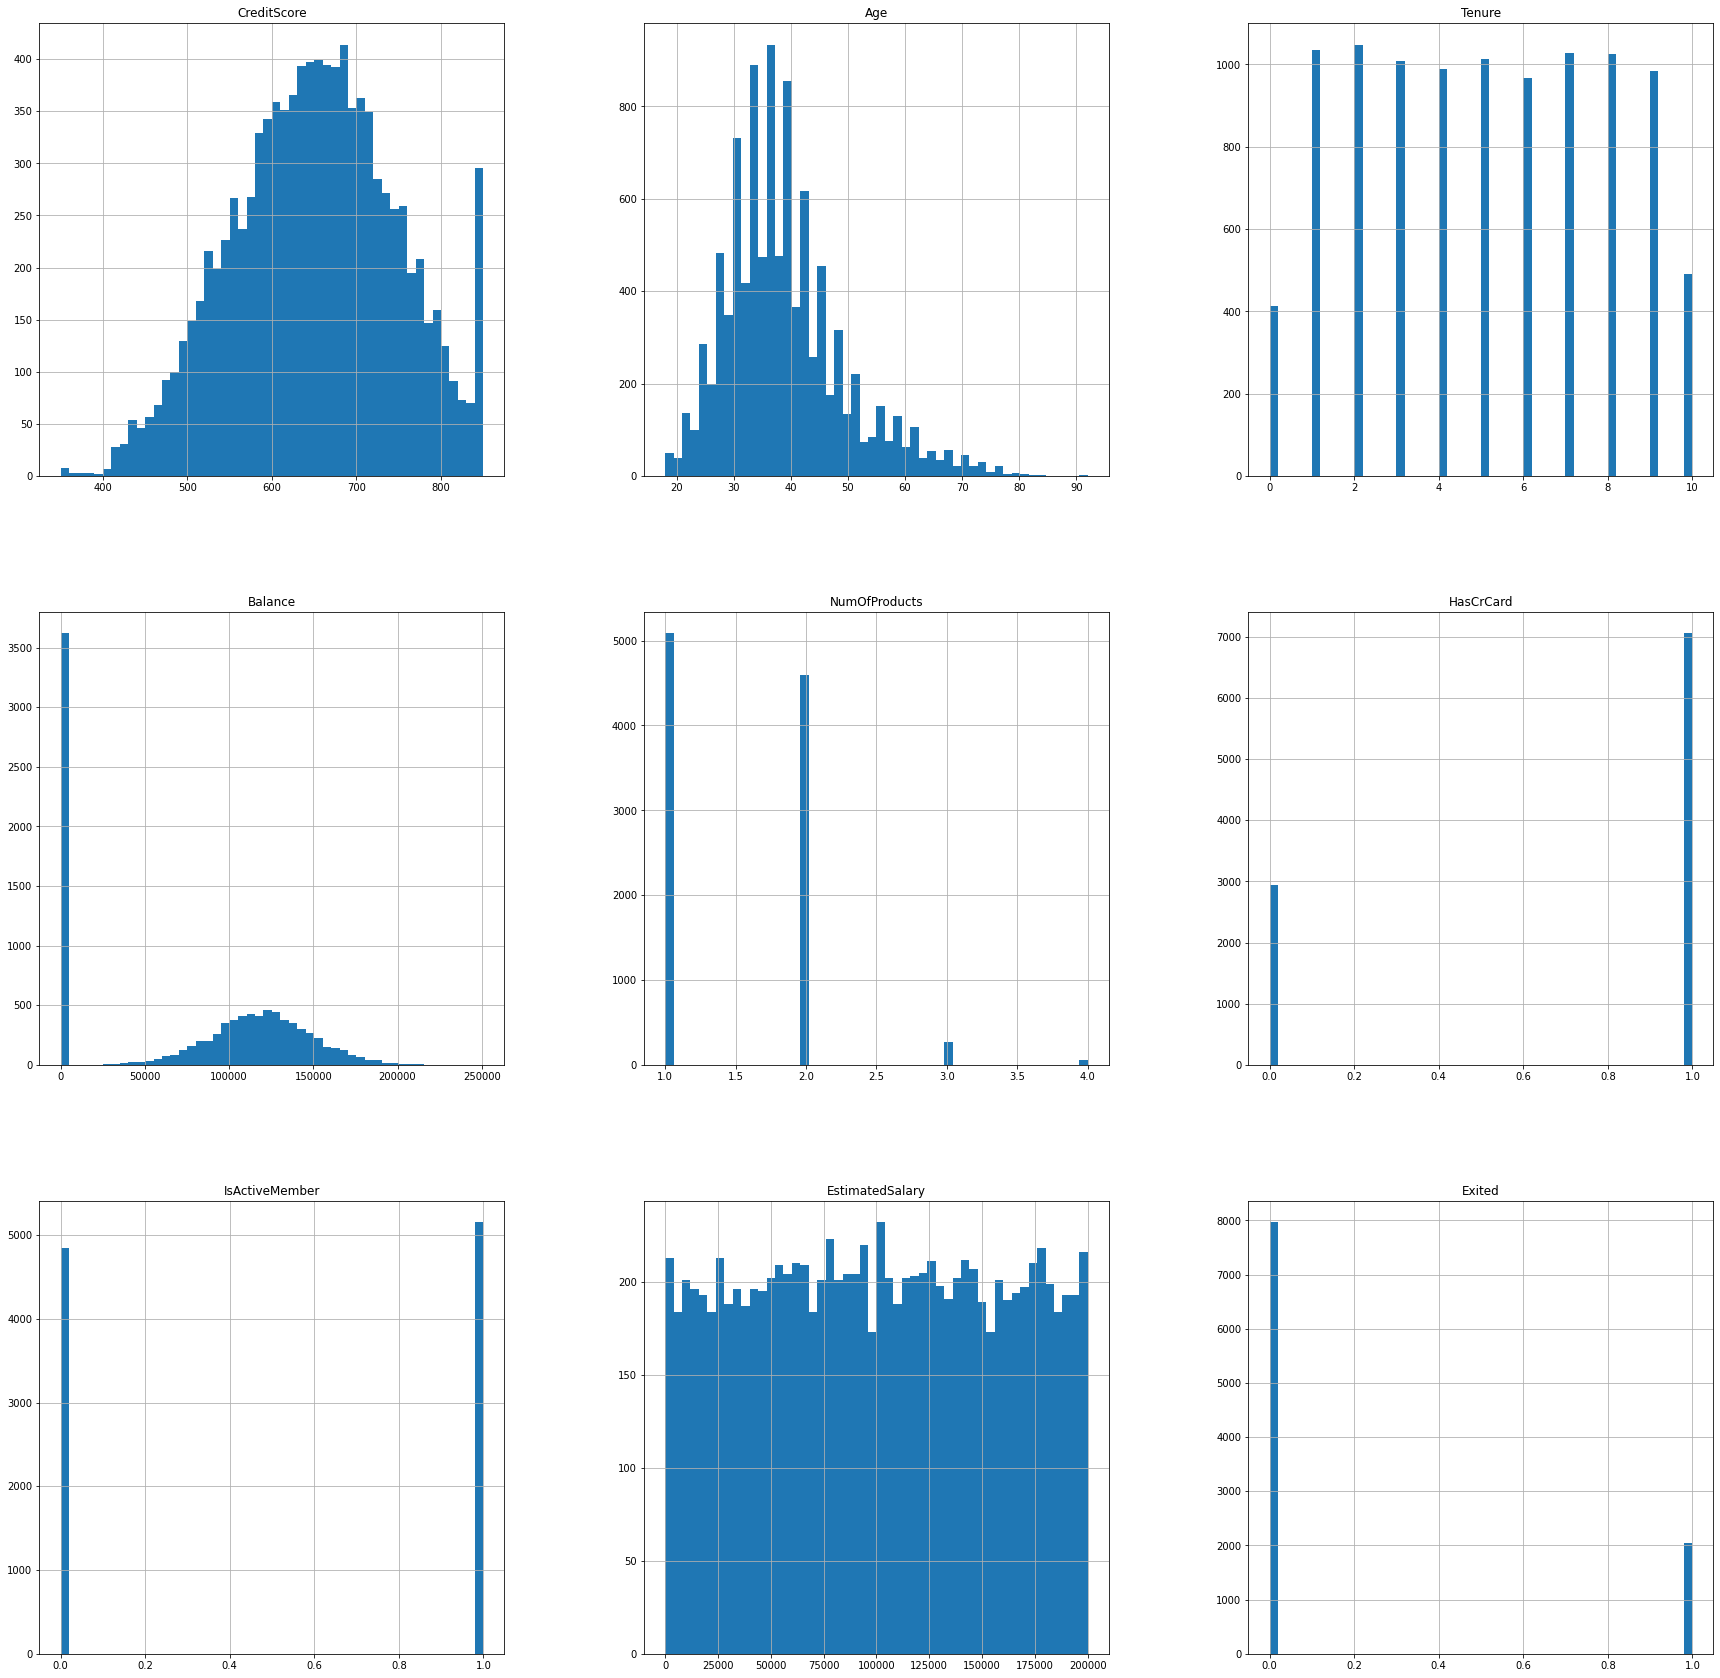

In [129]:
data.hist(bins=50, figsize=(30,30)) 
plt.show()

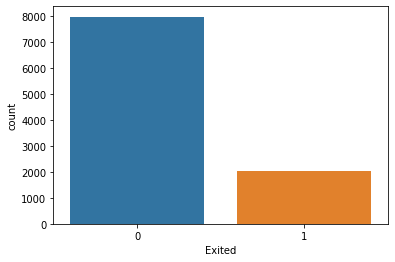

In [130]:
sns.countplot(x="Exited", data=data)
plt.show()

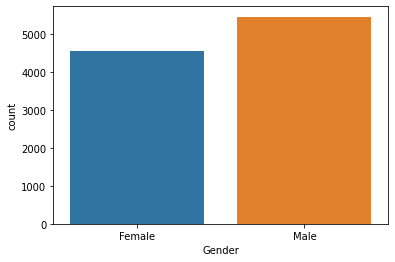

In [131]:
sns.countplot(x="Gender", data=data)
plt.show()

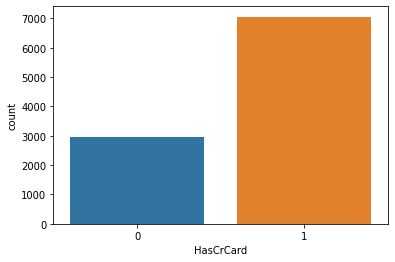

In [132]:
sns.countplot(x="HasCrCard", data=data)
plt.show()

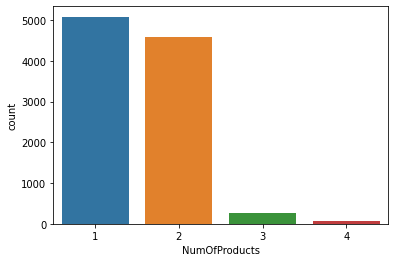

In [133]:
sns.countplot(x="NumOfProducts", data=data)
plt.show()

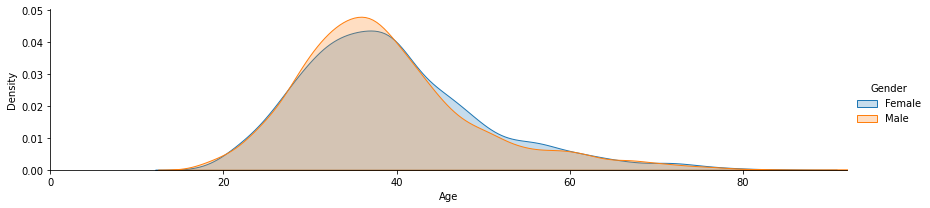

In [134]:
graph = sns.FacetGrid(data, hue = 'Gender', aspect=4)
graph.map(sns.kdeplot, 'Age', shade= True )
graph.set(xlim=(0 , data['Age'].max()))
graph.add_legend()

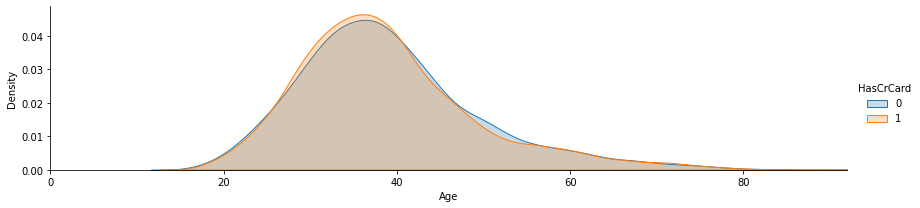

In [135]:
graph = sns.FacetGrid(data, hue = 'HasCrCard', aspect=4)
graph.map(sns.kdeplot, 'Age', shade= True )
graph.set(xlim=(0 , data['Age'].max()))
graph.add_legend()

In [136]:
corr = data.corr()
corr.shape

(9, 9)

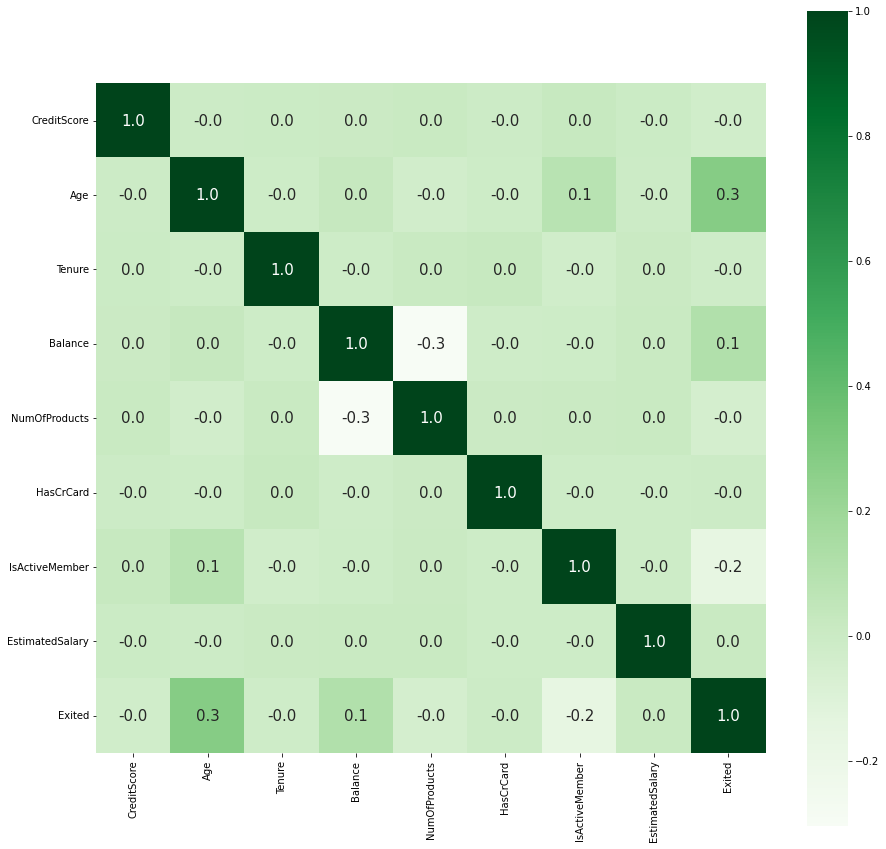

In [137]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

In [138]:
data.shape

(10000, 11)

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [140]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [143]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random', max_features='log2', min_samples_leaf=2, min_samples_split=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

In [144]:
y_predict = classifier.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusionmatrix = confusion_matrix(y_test, y_predict)
print(confusionmatrix)
print(classification_report(y_test, y_predict))

[[747  62]
 [112  79]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       809
           1       0.56      0.41      0.48       191

    accuracy                           0.83      1000
   macro avg       0.71      0.67      0.69      1000
weighted avg       0.81      0.83      0.82      1000



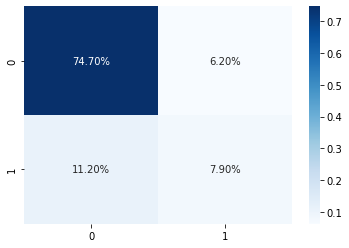

In [146]:
sns.heatmap(confusionmatrix/np.sum(confusionmatrix), annot=True, fmt='.2%', cmap='Blues')

In [147]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

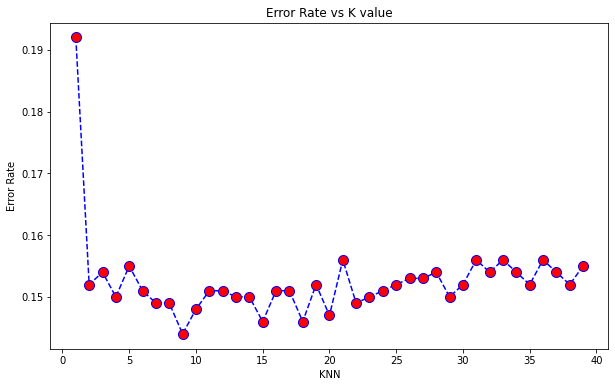

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('KNN')
plt.ylabel('Error Rate')

In [149]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator=knn, X = X_train, y = y_train, cv = 10)
print(accuracies.mean()*100)

83.80000000000001


In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[779  30]
 [114  77]]


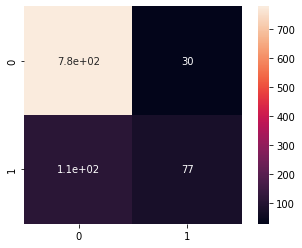

In [151]:
sns.heatmap(cm, square=True, annot=True)

[[789  20]
 [147  44]]
0.833


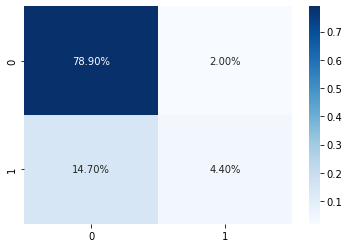

In [152]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
print(cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
ac = accuracy_score(y_test, y_prediction)
print(ac)

In [153]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [154]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
from sklearn.model_selection import cross_val_score
rfc.fit(X_train, y_train)
y_prediction = rfc.predict(X_test)
accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv = 10)
print(accuracies.mean()*100)
cm = confusion_matrix(y_test, y_prediction)
print(cm)

86.02222222222223
[[778  31]
 [100  91]]


In [155]:
rfc.feature_importances_

array([0.14857182, 0.03553072, 0.01957936, 0.23792638, 0.08612899,
       0.14413177, 0.12072288, 0.01981789, 0.03374219, 0.153848  ])

In [156]:
!pip install xgboost

In [157]:
import xgboost as xgb

In [158]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [159]:
y_prediction = model.predict(X_test)

In [160]:
accuracy = accuracy_score(y_test, y_prediction)*100
print(accuracy)

86.6
